# Customer churn classification challenge

You will perform a classification task on a telecom dataset, in order to predict customer churn. You will use the `telecom.csv` dataset. The goal is to predict the `Churn?` column.

Customer churn was one of the first widely adopted machine learning applications. It helps predicting customers that might leave (e.g. for competitors), in order to make an offer and retain them for example.

# I. Data Exploration & Data Preparation

First, you will explore and prepare the data.

Follow at least the following steps:
- load the data with pandas
- have a look at the features, the kind of data: what is categorical, what is not?
- Are there duplicates? Are there missing data?

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('telecom.csv')
df.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Quantitative data are:
- Account length
- VMail Message
- Day mins
- Day calls
- Day charge
- Eve mins
- Eve calls
- Eve charge
- Night mins
- Night calls
- Night charge
- Intl mins
- Intl calls
- Intl charge
- CustServ Calls

Qualitative data are:
- Area code
- Int'l plan
- VMail Plan

In [2]:
# There is no missing values
df.isna().sum()

Account Length    0
Area Code         0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [3]:
# There is no duplicate
df.duplicated().sum()

0

Have a look at the data and try to understand their meaning, for example:
- Plot the `Day Mins` as a function of the `Day Charge`
- Is there a correlation between `VMail Plan` and `VMail Message`?
- What is the churner balance?

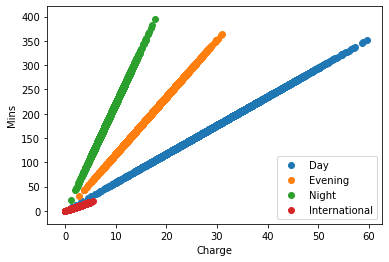

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['Day Charge'], df['Day Mins'], label='Day')
plt.scatter(df['Eve Charge'], df['Eve Mins'], label='Evening')
plt.scatter(df['Night Charge'], df['Night Mins'], label='Night')
plt.scatter(df['Intl Charge'], df['Intl Mins'], label='International')
plt.legend()
plt.xlabel('Charge')
plt.ylabel('Mins')
plt.show()

> There is a clear, strong correlation between the charges and minutes, thus no need to keep them both

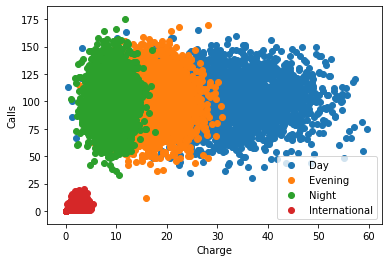

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['Day Charge'], df['Day Calls'], label='Day')
plt.scatter(df['Eve Charge'], df['Eve Calls'], label='Evening')
plt.scatter(df['Night Charge'], df['Night Calls'], label='Night')
plt.scatter(df['Intl Charge'], df['Intl Calls'], label='International')
plt.legend()
plt.xlabel('Charge')
plt.ylabel('Calls')
plt.show()

> No clear correlation though with the calls, then we can keep them

In [6]:
# Check the correlation between VMail plan and VMail message
vmail_plan = df['VMail Plan'] == 'yes'
vmail_message_positive = df['VMail Message'] > 1
# Compute the number of samples where VMail plan is yes and VMail message is equal to 0
np.bitwise_xor(vmail_message_positive.values, vmail_plan.values).sum()

0

> Anytime there is a VMail Plan that is yes, there are at least 1 VMail message

In [7]:
df['Churn?'].value_counts(normalize=True)

False.    0.855086
True.     0.144914
Name: Churn?, dtype: float64

> There are 85.5% non churner in the dataset

Prepare your data:
- Choose the features you want to use based on the previous analysis
- Split the data
- Prepare the data (both categorical and quantitative features)

In [8]:
# Features selection
features = ['Account Length', 'Area Code', "Int'l Plan", 'VMail Plan',
            'VMail Message', 'Day Calls', 'Day Charge',
            'Eve Calls', 'Eve Charge', 
            'Night Calls', 'Night Charge',
            'Intl Calls', 'Intl Charge', 'CustServ Calls']
X = df[features]
y = df['Churn?']

In [9]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=0)

In [10]:
# Prepare qualitative data with one hot encoding
quali_feats = ['Area Code', "Int'l Plan", 'VMail Plan']
X_train_quali = X_train[quali_feats]
X_test_quali = X_test[quali_feats]

X_train_quali = pd.get_dummies(X_train_quali)
X_test_quali = pd.get_dummies(X_test_quali)
X_train_quali

,Area Code,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes
1112,408,1,0,1,0
3112,415,1,0,1,0
2863,415,1,0,1,0
1909,415,1,0,0,1
273,415,1,0,1,0
...,...,...,...,...,...
213,408,1,0,0,1
398,510,1,0,1,0
228,415,1,0,0,1
3078,408,1,0,1,0


In [11]:
from sklearn.preprocessing import StandardScaler
# Prepare quantitative data with standard scaler
X_train_quanti = X_train.drop(columns=quali_feats)
X_test_quanti = X_test.drop(columns=quali_feats)

scaler = StandardScaler()
X_train_quanti = scaler.fit_transform(X_train_quanti)
X_test_quanti = scaler.transform(X_test_quanti)

In [12]:
# Concatenate it all together
X_train = np.concatenate([X_train_quanti, X_train_quali], axis=1)
X_test = np.concatenate([X_test_quanti, X_test_quali], axis=1)

# II. Model Training and Optimization

You first have to choose an evaluation metric. List all the classification metrics you know, and pick one that seems well suited for your application.

Select the models you want to test among the classification models you know.

Do not forget to optimize hyperparameters using grid search (or randomized search) with cross validation.

> Here the accuracy might not be the best metric to optimize because of class balance, let's optimize the ROC AUC

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {'n_estimators': [10, 50, 100],
               'learning_rate': [0.1, 0.03, 0.01],
               'max_depth': [3, 5, 8]}

grid = GridSearchCV(GradientBoostingClassifier(),
                    param_grid=grid_params,
                    scoring='roc_auc',
                    cv=5,
                    return_train_score=True)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.03, 0.01],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [14]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

In [15]:
grid.best_score_

0.9139107968055337

# III. Evaluate your model

Finally evaluate your model on the test dataset, using your metric.

In [16]:
from sklearn.metrics import roc_auc_score, accuracy_score

y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)[:, 1]

print('final accuracy:', accuracy_score(y_test, y_pred))
print('final ROC AUC:', roc_auc_score(y_test, y_pred_proba))

final accuracy: 0.967016491754123
final ROC AUC: 0.9512027491408934
